In [ ]:
import numpy as np
import pandas as pd

# Intro to Pandas

## Creating a Dataframe

In [ ]:
df = pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'],
                   'Sue': ['Pretty good.', 'Bland.']})
df

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


## Indexing

In [ ]:
df['Bob']

,Bob
0,I liked it.
1,It was awful.


In [ ]:
reviews = pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']},
                         index=['Product A', 'Product B'])
reviews

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


In [ ]:
reviews.loc['Product A']

,Product A
Bob,I liked it.
Sue,Pretty good.


## Another Way to Create a DataFrame

In [ ]:
student_register = pd.DataFrame()
student_register['Name'] = ['Andy','Beale',
                            'Cherry', 'Donny']
student_register['Age'] = [20, 19, 20, 14]
student_register['Student'] = [False, True,
                               True, False]

In [ ]:
student_register

,Name,Age,Student
0,Andy,20,False
1,Beale,19,True
2,Cherry,20,True
3,Donny,14,False


# Practice on Spaceship Titanic

<img src = 'https://i.redd.it/i-built-a-titanic-spaceship-replica-from-that-one-doctor-v0-440xfafhy3nf1.jpg?width=976&format=pjpg&auto=webp&s=70ce541a4e531ce0bf13713fdb76ecb792578444'>

We will be using Pandas and NumPy for practice on the Spaceship Titanic data, a widely used data set for practice. This is a popular practice dataset in Kaggle. It involves predicting whether a passenger will be transported to a new planet

In [ ]:
url = "https://raw.githubusercontent.com/AmirFARES/Kaggle-Spaceship-Titanic/main/data/train.csv"
df = pd.read_csv(url)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Not all rows are filled with information. We might be tempted to drop them, but nah

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

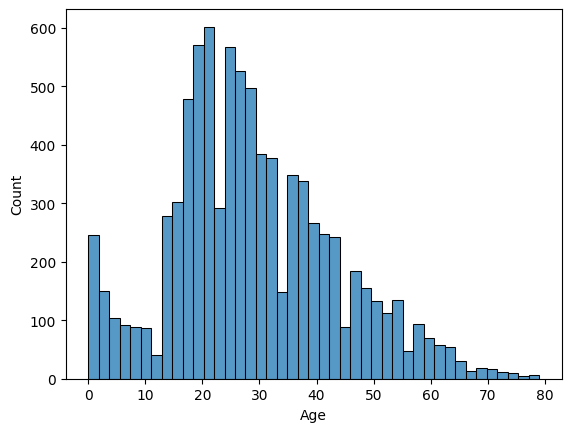

In [ ]:
sns.histplot(df, x = 'Age')

In [ ]:
bins = [0, 10, 20, 30, 60, float('inf')]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows to show the new column
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Adult
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Young Adult
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Adult
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Adult
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Teen


<Axes: xlabel='AgeGroup', ylabel='Count'>

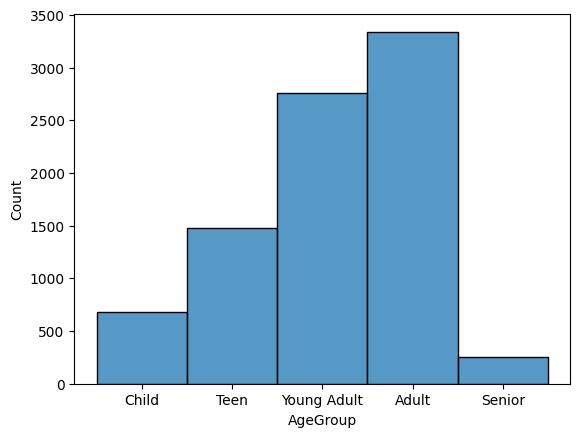

In [ ]:
sns.histplot(df, x = 'AgeGroup')

We can also see that RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck are spending features, so we can create a new feature called Spending

In [ ]:
df['TotalSpending'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup,TotalSpending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Adult,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Young Adult,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Adult,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Adult,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Teen,1091.0


<Axes: xlabel='TotalSpending', ylabel='Count'>

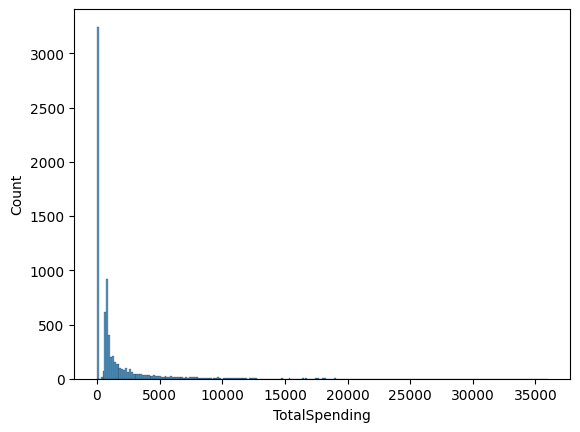

In [ ]:
sns.histplot(df, x = 'TotalSpending')

We can also see that there are some people that didn't spend anything. Therefore, we can make a new column of Spending (boolean [0 or 1])

In [ ]:
df['SpentAnything'] = df['TotalSpending'] > 0

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup,TotalSpending,SpentAnything
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Adult,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Young Adult,736.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Adult,10383.0,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Adult,5176.0,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Teen,1091.0,True


We can then plot to see the difference of people that spent something or not

<Axes: xlabel='SpentAnything', ylabel='count'>

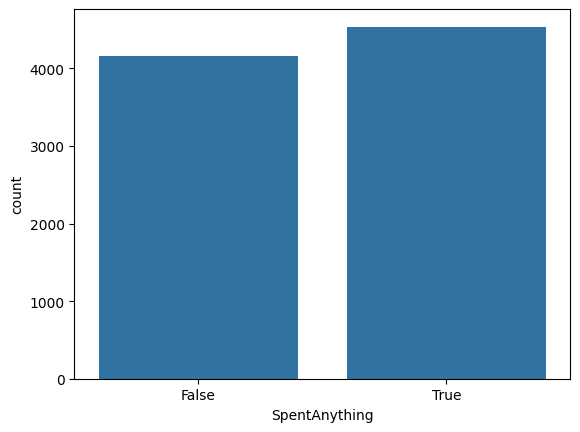

In [ ]:
sns.countplot(df, x = 'SpentAnything')

<Axes: xlabel='TotalSpending', ylabel='Count'>

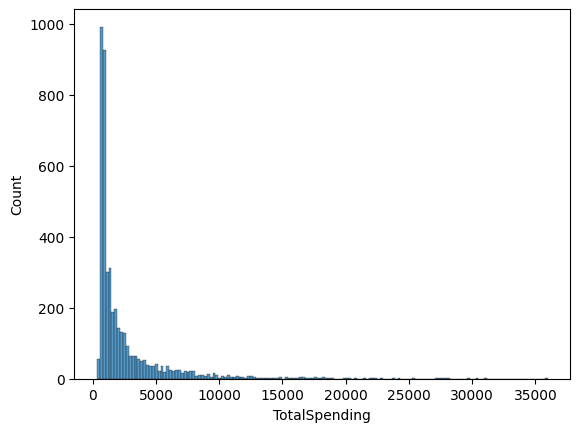

In [ ]:
'''We can now see the amount people are spending for those who ACTUALLY spent anything'''
sns.histplot(df[df['SpentAnything'] == True ], x = 'TotalSpending')

## Practice on Missing Value Imputation

In [ ]:
# Missing Values
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


We see that age as a numeric value only has a bit missing. So, we can just fill that with the median.

We can also see that the most column with missing value is the total spending.

Using our domain knowledge, once people are in cryosleep, they cannot spend anything. Therefore, we can just make their spending to be 0 if they are in cryosleep.

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

# Update Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
# If a passenger is in CryoSleep, their spending should be 0
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in spending_cols:
    df.loc[df['CryoSleep'] == True, col] = df.loc[df['CryoSleep'] == True, col].fillna(0)



In [ ]:
# For those not in CryoSleep, impute spending with the median of the non-cryosleep group
for col in spending_cols:
    df.loc[df['CryoSleep'] == False, col] = df.loc[df['CryoSleep'] == False, col].fillna(df.loc[df['CryoSleep'] == False, col].median())

In [ ]:
df['TotalSpending'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

In [ ]:
# fill remaining
df['TotalSpending'] = df['TotalSpending'].fillna(df['TotalSpending'].median())

#update SpentAnything
df['SpentAnything'] = df['TotalSpending'] > 0

In [ ]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,0
VIP,203
RoomService,2
FoodCourt,3
ShoppingMall,8


Seems like there are still missing values left for the shopping columns

In [ ]:
# Show rows where FoodCourt, ShoppingMall, Spa, or VRDeck are empty
missing_spending_cols = df[df['FoodCourt'].isnull() |
                           df['ShoppingMall'].isnull() |
                           df['Spa'].isnull() |
                           df['VRDeck'].isnull()]

len(missing_spending_cols)

22

Turns out it is because the cryosleep condition is missing. We can just drop them 😁


In [ ]:
df.dropna(subset=['CryoSleep'], inplace=True)

## Do you have any more ideas on missing value imputation?